In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [18]:
sns.set()

In [5]:
df=pd.read_csv("../data/cleaned_data.csv")

In [6]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [14]:
df.columns=df.columns.str.replace(" ","_")

In [15]:
cat_cols=[col for col in df.columns if df[col].nunique()<10]

In [17]:
num_cols=list(set(df.columns)-set(cat_cols))

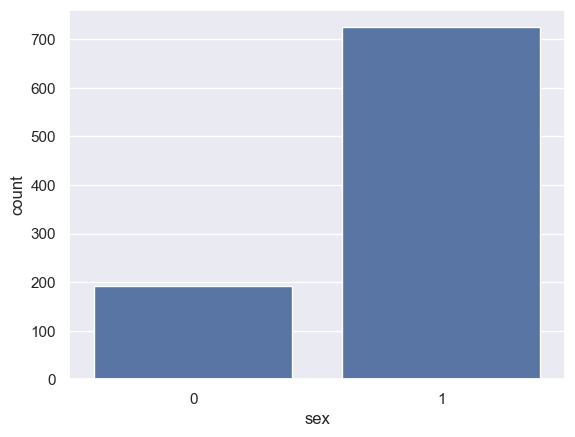

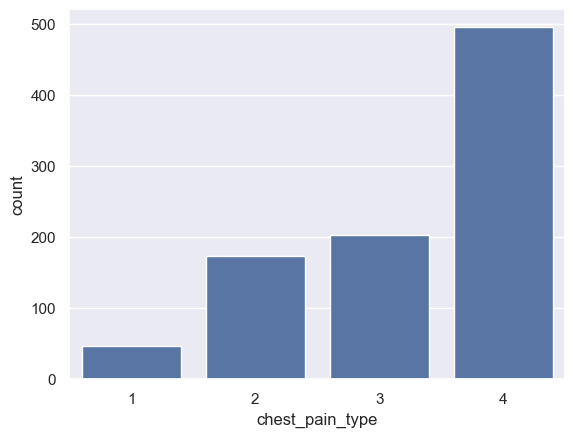

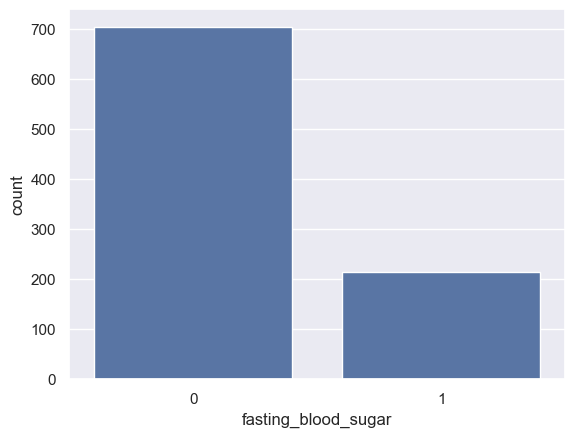

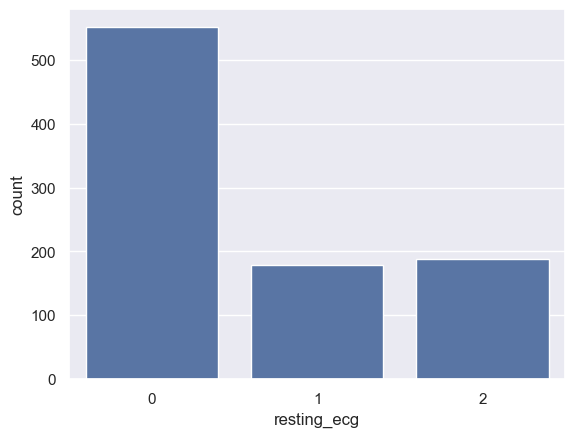

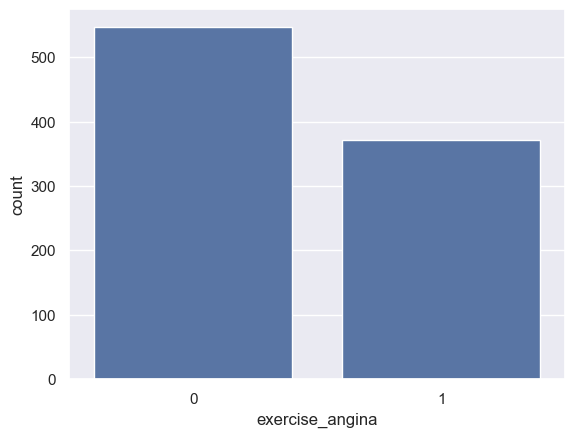

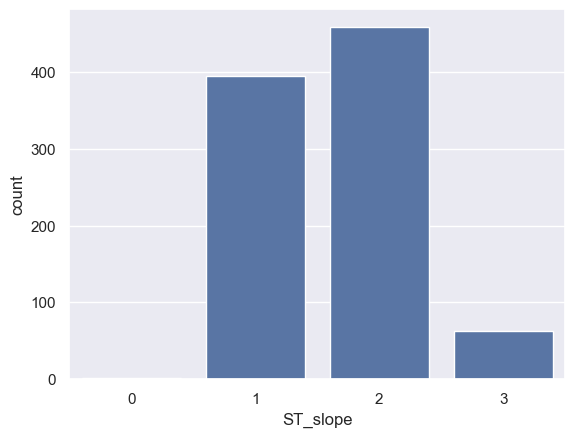

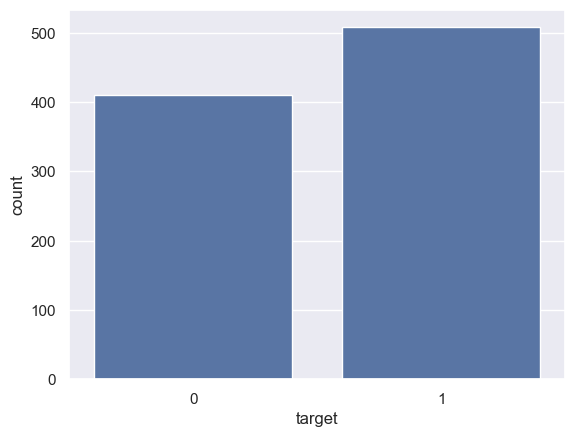

In [19]:
for col in cat_cols:
    sns.countplot(df,x=col)
    
    plt.show()

In [23]:
df.ST_slope.value_counts()

ST_slope
2    459
1    395
3     63
0      1
Name: count, dtype: int64

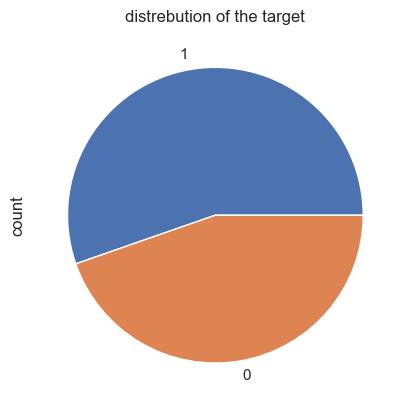

In [25]:
df.target.value_counts().plot(kind='pie',title='distrebution of the target');

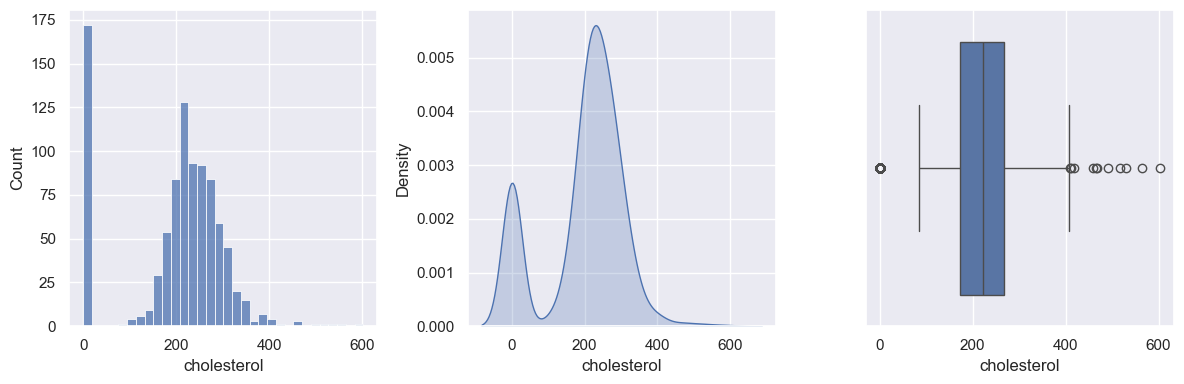

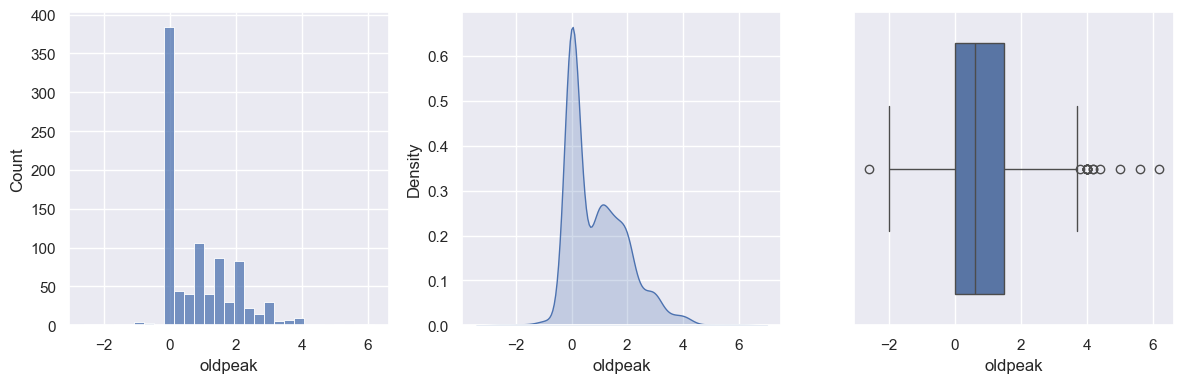

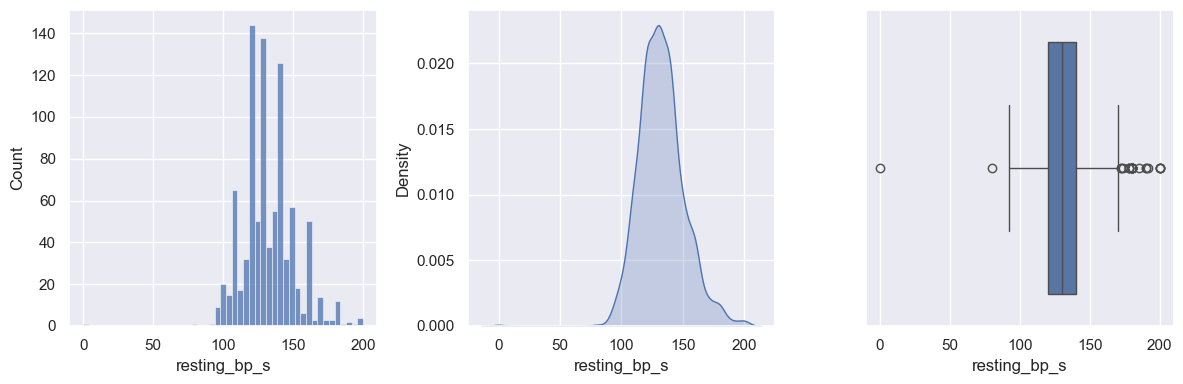

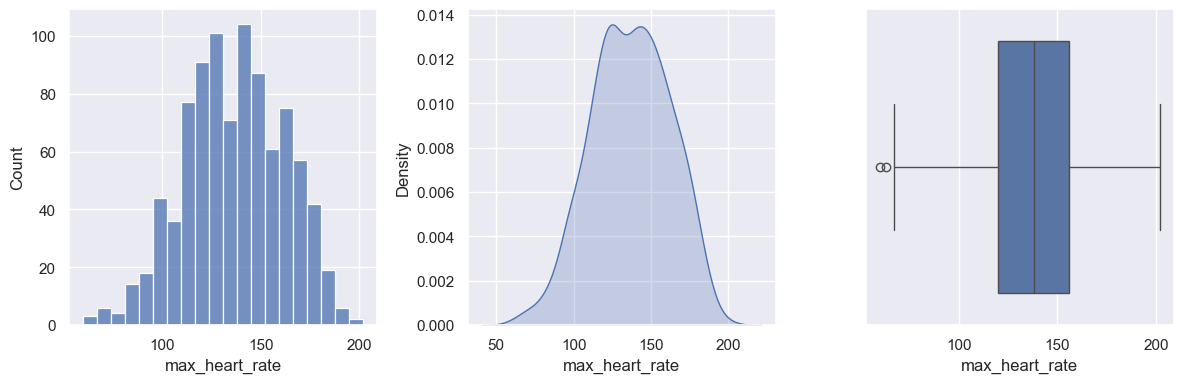

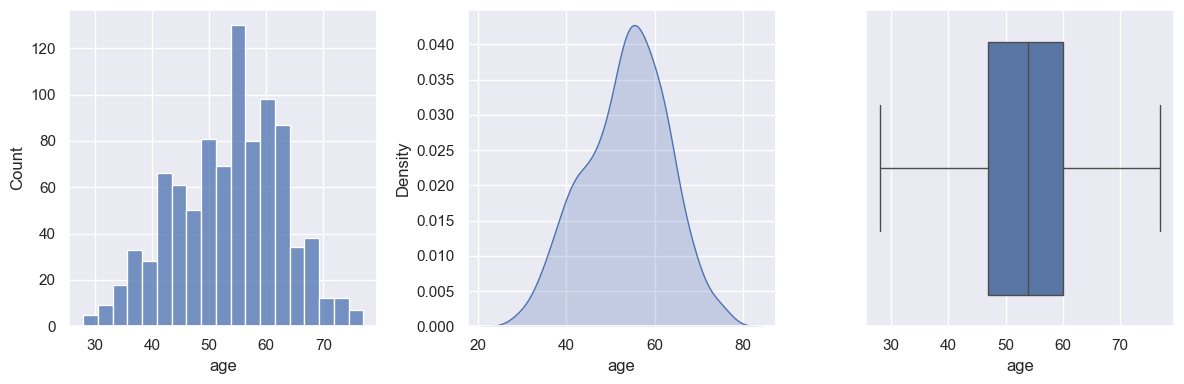

In [42]:

for col in num_cols:
    fig,ax=plt.subplots(1,3,figsize=(12,4))
    
    sns.histplot(df,x=col,ax=ax[0])
    sns.kdeplot(df,x=col,fill=True,ax=ax[1])
    sns.boxplot(df,x=col,ax=ax[2])
    plt.tight_layout()
    plt.show()

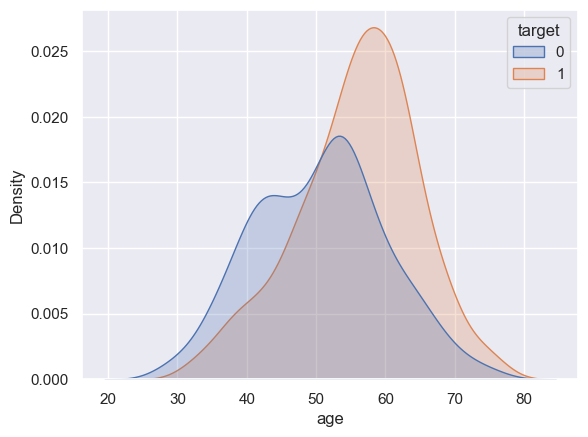

In [48]:
sns.kdeplot(df,x='age',hue='target',fill=True);

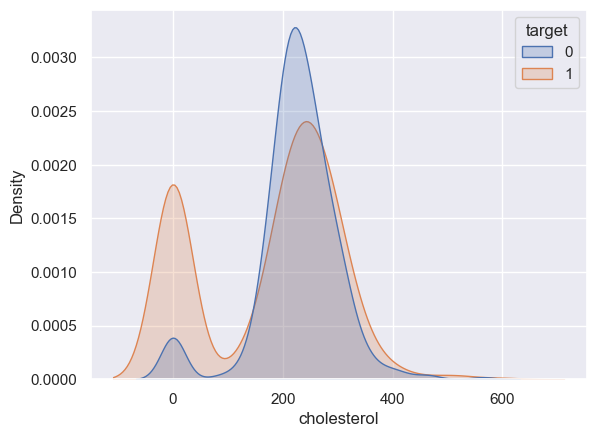

In [50]:
sns.kdeplot(df,x='cholesterol',hue='target',fill=True);

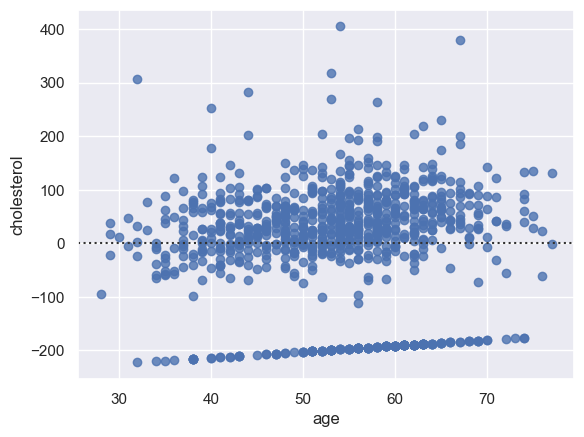

In [57]:
sns.residplot(df,x='age',y='cholesterol');

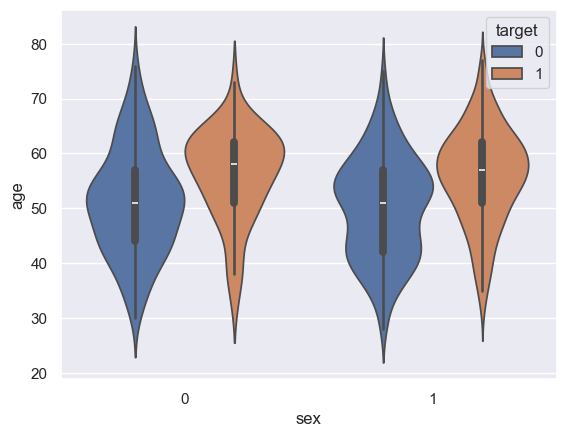

In [67]:
sns.violinplot(df,x='sex',y='age',hue='target');

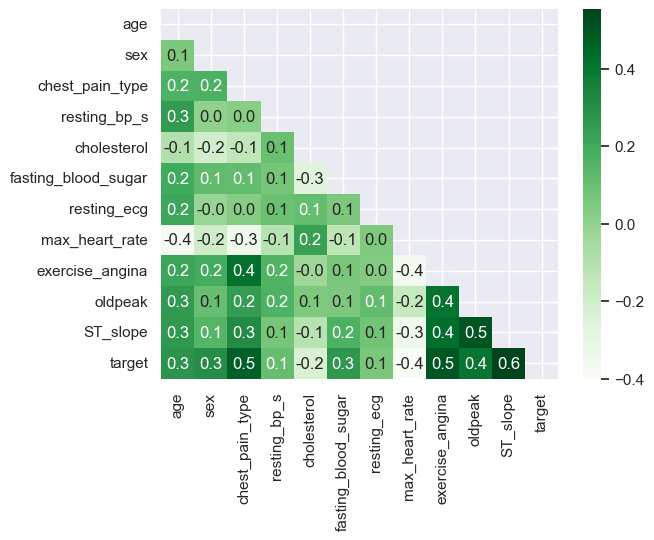

In [69]:
corr=df.corr()
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr,mask=mask,annot=True,cmap='Greens',fmt='.1f');